<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/BAN6440%20MODULE%204%20ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import unittest

In [3]:
# Load the dataset
data = pd.read_csv('/content/cluster_data.csv')


In [4]:
# Display the first few rows
print("First five rows of the dataset:")
print(data.head())


First five rows of the dataset:
   Feature 1  Feature 2
0   2.698582  -0.672960
1  -0.128113   4.355952
2   2.509049   5.773146
3  -1.518276   3.444886
4  -0.072283   2.883769


In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Feature 1    0
Feature 2    0
dtype: int64


In [7]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [9]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[ 2.12448886e-01, -9.64837835e-01],
       [-4.80018865e-01,  4.75834851e-01],
       [ 1.66018243e-01,  8.81829663e-01],
       [-8.20573067e-01,  2.14834506e-01],
       [-4.66341857e-01,  5.40868080e-02],
       [ 1.79495799e+00, -1.35142804e+00],
       [-3.79624596e-01,  4.18023700e-01],
       [ 1.72362970e+00, -1.23236284e+00],
       [-3.44871923e-02, -4.69996579e-01],
       [-6.26499963e-02, -3.37169782e-01],
       [-1.16799802e+00,  1.44041820e+00],
       [-1.07208080e+00,  4.15557203e-02],
       [-3.64865930e-01,  3.56973341e-01],
       [-9.27112648e-01,  1.66743506e+00],
       [-7.10631603e-01, -2.12480724e-01],
       [ 1.63942012e+00, -1.43047950e+00],
       [-5.33279259e-01, -1.17167129e-01],
       [ 1.83555749e+00, -1.95388569e+00],
       [-3.91919113e-01,  2.24134246e-01],
       [-1.14904433e+00, -5.00108265e-01],
       [-1.66392986e-02, -7.33039550e-01],
       [ 2.05246860e+00, -1.59046295e+00],
       [-5.58556028e-01, -6.69290705e-01],
       [-5.

In [13]:
# Determine optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    print(f"Inertia for k={k}: {kmeans.inertia_}")

Inertia for k=1: 1000.0
Inertia for k=2: 329.4938692991276
Inertia for k=3: 152.67384130652118
Inertia for k=4: 93.13569952117652
Inertia for k=5: 62.36217234183933
Inertia for k=6: 55.77610943207339
Inertia for k=7: 49.97627026690532
Inertia for k=8: 45.19137846342356
Inertia for k=9: 41.641535717345626


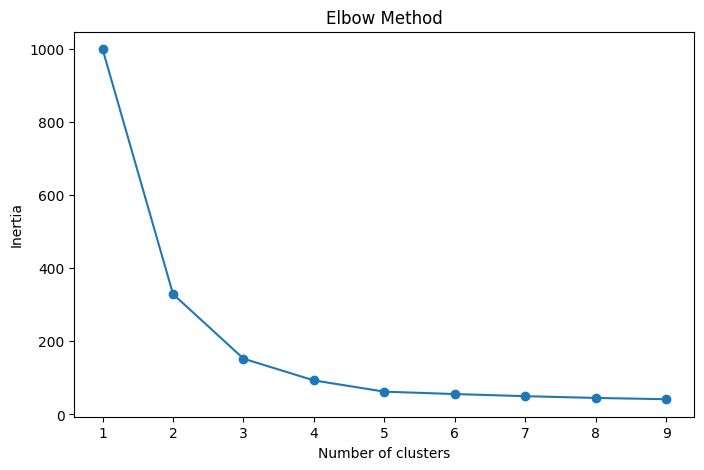

In [17]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [18]:
# From the Elbow Curve, choose the optimal number of clusters
optimal_clusters = 3  # Adjust based on the Elbow Curve

In [20]:
# Apply K-Means with chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
clusters

array([0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0,
       2, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0,
       0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2,
       0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1,
       2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 1,

In [21]:
# Add the cluster labels to the original data
data['Cluster'] = clusters

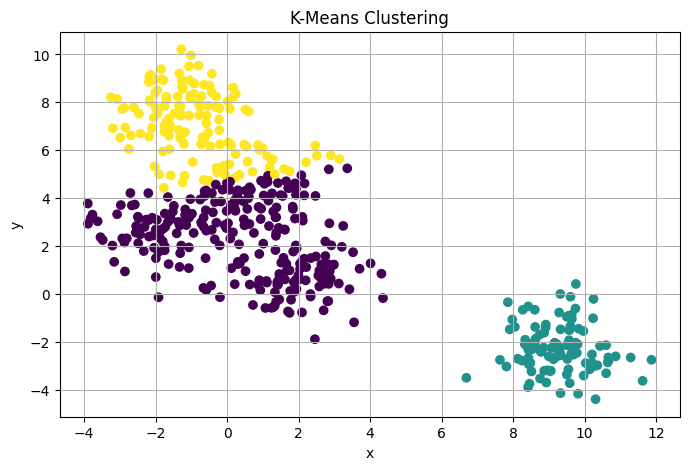

In [23]:
# Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(data['Feature 1'], data['Feature 2'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [28]:
# Evaluate the clustering performance using Silhouette Score
score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.54


In [33]:
class TestKMeansClustering(unittest.TestCase):
    def setUp(self):
        # Load and preprocess the dataset
        self.data = pd.read_csv('/content/cluster_data.csv')
        scaler = StandardScaler()
        self.scaled_data = scaler.fit_transform(self.data)

    def test_data_shape(self):
        # Test if the data has the expected number of columns
        self.assertEqual(self.data.shape[1], 2)


    def test_kmeans_clusters(self):
        # Test if KMeans assigns the correct number of clusters
        kmeans = KMeans(n_clusters=3, random_state=42)
        kmeans.fit(self.scaled_data)
        self.assertEqual(len(set(kmeans.labels_)), 3)

    def test_no_missing_values(self):
        # Test if there are no missing values in the dataset
        self.assertFalse(self.data.isnull().values.any())

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.032s

OK
